In [1]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
ticker = "NRG"

In [4]:
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today());

[*********************100%***********************]  1 of 1 downloaded


In [5]:
ohlcv.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-14,18.47,18.51,18.20,18.42,17.15,4808500
2015-09-15,18.65,19.24,18.61,19.05,17.73,6023300
2015-09-16,19.04,19.14,18.83,18.97,17.66,6446200
2015-09-17,18.98,19.53,18.68,19.17,17.84,7428100
2015-09-18,19.14,19.26,17.75,17.98,16.74,15523100


In [6]:
def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

In [7]:
df = MACD(ohlcv, 12, 26, 9)

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2015-10-29,12.85,13.02,12.82,12.89,12.13,4403200,13.011846,13.574443,-0.562598,-0.412460
2015-10-30,12.82,12.97,12.65,12.89,12.13,4596400,12.875784,13.459686,-0.583902,-0.450873
2015-11-02,12.86,13.44,12.75,13.36,12.58,7998800,12.830167,13.390171,-0.560003,-0.474750
2015-11-03,13.30,13.81,13.29,13.48,12.69,7984600,12.808558,13.335114,-0.526555,-0.485876
2015-11-04,13.93,14.54,13.67,14.08,13.25,10410700,12.876592,13.328451,-0.451860,-0.478677


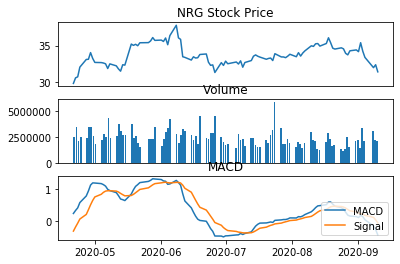

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Visualization - plotting MACD/signal along with close price and volume for last 100 data points
plt.subplot(311)
plt.plot(df.iloc[-100:,4])
plt.title('NRG Stock Price')
plt.xticks([])

plt.subplot(312)
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Volume')
plt.xticks([])

plt.subplot(313)
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='lower right')

plt.show();

Text(0.5, 0.98, 'Stock Price with MACD')

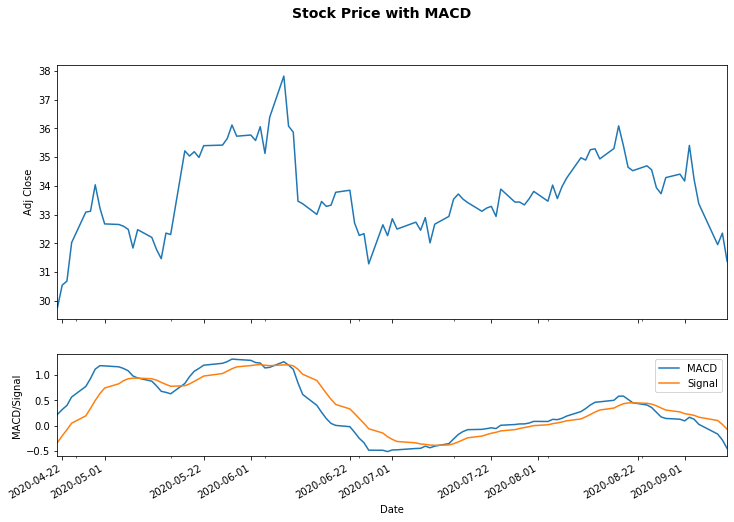

In [18]:
# Visualization - Using object orient approach
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(12, 8), gridspec_kw = {'height_ratios':[2.5, 1]})
df.iloc[-100:,4].plot(ax=ax0)
ax0.set(ylabel='Adj Close')

df.iloc[-100:,[-2,-1]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD/Signal')

# Title the figure
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')
